<h1>Deep Rain - DWD Demo</h1>

In this small notebook we'll show to retrieve coverage data from Deep Rain Cube: https://datacubes.eecs.jacobs-university.de/rasdaman/ows#/services

In [1]:
# Imports
import requests # HTTP requests.
import xarray as xr # Opening netcdf files.
import io # Create file-like object from netcdf bytes representation.

Service endpoint URL.

In [2]:
service_endpoint = "https://datacubes.eecs.jacobs-university.de/rasdaman/ows"

Function that retrieves the response of the query as an xarray dataset.

In [3]:
def get_query_response(query):
    '''
        Function returns a query as a netcdf byte-encoded response.

        Parameters: None

        Returns xarray.Dataset
    '''
    
    query_response = requests.post(service_endpoint, data={'query': query})

    # Convert bytes to file-like object
    netcdf_file = io.BytesIO(query_response.content)

    # Convert the netcdf_file like object to a xarray dataset.
    ds = xr.open_dataset(netcdf_file)    
    
    # Retun the xarray dataset.
    return ds

<h2>Modify Query Here</h2>

In [4]:
# query = '''
#             for $c in (COSMO_DE_EPS_temperature)
#                     return encode(
#                         $c[ansi("2016-12-01":"2016-12-31"),
#                             ensemble(1),
#                             forecast_hour(0),
#                             pressure_level(50000),
#                             Lat(50.10266315489885),
#                             Long(8.7478446842928)
#                         ] - 273.15, "application/netcdf"
#                     )
#         '''

query = '''
        for $c in (COSMO_DE_EPS_temperature) 
                return encode(
                    $c[ansi("2016-12-01":"2016-12-31"),
                        ensemble(1),
                        forecast_hour(0),
                        pressure_level(50000),
                        Lat(50.10266315489885),
                        Long(8.7478446842928)
                    ] - 273.15, "application/netcdf")
        '''



# Save the query response into query_response
ds = get_query_response(query) # result is similar to processed_netcdf.nc

# Check the generated dataset
ds

/p/home/jusers/schultz1/juwels/rasdaman_env/lib/python3.6/site-packages/h5netcdf/core.py:765: FutureWarning: String decoding changed with h5py >= 3.0. Currently backwards compatibility with h5py < 3.0 is kept by decoding vlen strings per default. This will change in future versions for consistency with h5py >= 3.0. Setting 'decode_vlen_strings=True' forces string decoding.
  warnings.warn(msg, FutureWarning, stacklevel=0)


<xarray.Dataset>
Dimensions:      (ansi: 241)
Coordinates:
  * ansi         (ansi) float64 1.519e+05 1.519e+05 ... 1.519e+05 1.519e+05
Data variables:
    temperature  (ansi) float64 ...
Attributes:
    CDI:              Climate Data Interface version ?? (http://mpimet.mpg.de...
    CDO:              Climate Data Operators version 1.9.3 (http://mpimet.mpg...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...
    acknowledgement:  If you make use of these data we ask to acknowledge the...
    description:      Temperature from the COSMO Ensemble Prediction System (...
    originator:       Deutscher Wetterdienst - Zentrale, Frankfurter Straße 1...
    provider:         Juelich Supercomputing Centre, Forschungszentrum Juelic...
    title:            COSMO_EPS_Data

In [7]:
import matplotlib.pyplot as plt

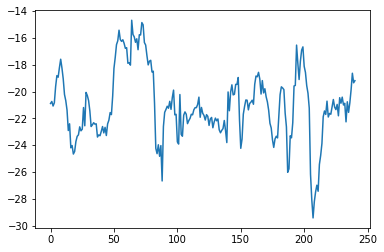

In [8]:
plt.plot(ds['temperature'])

In [17]:
# Radiosonde for pressure levels 50000 -> 100000
# In Kelvins
query = '''
for $c in (COSMO_DE_EPS_temperature) 
        return encode(
            $c[ansi("2016-12-01"),
                ensemble(1),
                forecast_hour(0),
                pressure_level(50000:100000),
                Lat(50.10266315489885),
                Long(8.7478446842928)
            ], "application/netcdf")
            
        '''


# Save the query response into query_response
ds = get_query_response(query) # result is similar to processed_netcdf.nc

# Check the generated dataset
ds

<xarray.Dataset>
Dimensions:         (pressure_level: 6)
Coordinates:
  * pressure_level  (pressure_level) float64 5e+04 7e+04 ... 9.75e+04 1e+05
Data variables:
    temperature     (pressure_level) float32 ...
Attributes:
    CDI:              Climate Data Interface version ?? (http://mpimet.mpg.de...
    CDO:              Climate Data Operators version 1.9.3 (http://mpimet.mpg...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...
    acknowledgement:  If you make use of these data we ask to acknowledge the...
    description:      Temperature from the COSMO Ensemble Prediction System (...
    originator:       Deutscher Wetterdienst - Zentrale, Frankfurter Straße 1...
    provider:         Juelich Supercomputing Centre, Forschungszentrum Juelic...
    title:            COSMO_EPS_Data

Text(0.5, 0, 'temperature (K)')

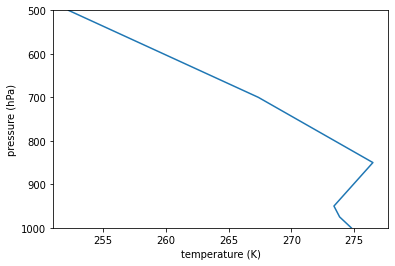

In [22]:
plt.plot(ds['temperature'], ds['pressure_level']*.01)
plt.ylim(1000., 500.)
plt.ylabel('pressure (hPa)')
plt.xlabel('temperature (K)')

In [23]:
# Radiosonde for pressure levels 50000 -> 100000
# In Celsius
query = '''
for $c in (COSMO_DE_EPS_temperature) 
        return encode(
            $c[ansi("2016-12-01"),
                ensemble(1),
                forecast_hour(0),
                pressure_level(50000:100000),
                Lat(50.10266315489885),
                Long(8.7478446842928)
            ] - 273.15, "application/netcdf")
        '''


# Save the query response into query_response
ds = get_query_response(query) # result is similar to processed_netcdf.nc

# Check the generated dataset
ds


/p/home/jusers/schultz1/juwels/rasdaman_env/lib/python3.6/site-packages/h5netcdf/core.py:765: FutureWarning: String decoding changed with h5py >= 3.0. Currently backwards compatibility with h5py < 3.0 is kept by decoding vlen strings per default. This will change in future versions for consistency with h5py >= 3.0. Setting 'decode_vlen_strings=True' forces string decoding.
  warnings.warn(msg, FutureWarning, stacklevel=0)


<xarray.Dataset>
Dimensions:         (pressure_level: 6)
Coordinates:
  * pressure_level  (pressure_level) float64 5e+04 7e+04 ... 9.75e+04 1e+05
Data variables:
    temperature     (pressure_level) float64 ...
Attributes:
    CDI:              Climate Data Interface version ?? (http://mpimet.mpg.de...
    CDO:              Climate Data Operators version 1.9.3 (http://mpimet.mpg...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...
    acknowledgement:  If you make use of these data we ask to acknowledge the...
    description:      Temperature from the COSMO Ensemble Prediction System (...
    originator:       Deutscher Wetterdienst - Zentrale, Frankfurter Straße 1...
    provider:         Juelich Supercomputing Centre, Forschungszentrum Juelic...
    title:            COSMO_EPS_Data

In [25]:
# Curtain plot for pressure levels 50000 -> 100000
# In Kelvins
query = '''
for $c in (COSMO_DE_EPS_temperature) 
        return encode(
            $c[ansi("2016-12-01":"2016-12-31"),
                ensemble(1),
                forecast_hour(0),
                pressure_level(50000:100000),
                Lat(50.10266315489885),
                Long(8.7478446842928)
            ], "application/netcdf")
        '''



# Save the query response into query_response
ds = get_query_response(query) # result is similar to processed_netcdf.nc

# Check the generated dataset
ds            


<xarray.Dataset>
Dimensions:         (ansi: 241, pressure_level: 6)
Coordinates:
  * ansi            (ansi) float64 1.519e+05 1.519e+05 ... 1.519e+05 1.519e+05
  * pressure_level  (pressure_level) float64 5e+04 7e+04 ... 9.75e+04 1e+05
Data variables:
    temperature     (ansi, pressure_level) float32 ...
Attributes:
    CDI:              Climate Data Interface version ?? (http://mpimet.mpg.de...
    CDO:              Climate Data Operators version 1.9.3 (http://mpimet.mpg...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...
    acknowledgement:  If you make use of these data we ask to acknowledge the...
    description:      Temperature from the COSMO Ensemble Prediction System (...
    originator:       Deutscher Wetterdienst - Zentrale, Frankfurter Straße 1...
    provider:         Juelich Supercomputing Centre, Forschungszentrum Juelic...
    title:            COSMO_EPS_Data

Text(0, 0.5, 'pressure (hPa)')

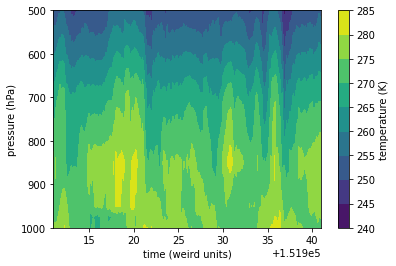

In [39]:
c = plt.contourf(ds['ansi'], ds['pressure_level']*0.01, ds['temperature'].T)
cb = plt.colorbar(c, label='temperature (K)')
plt.ylim(1000., 500.)
plt.xlabel('time (weird units)')
plt.ylabel('pressure (hPa)')

In [16]:
# Curtain plot for pressure levels 50000 -> 100000
# In Celsius
query = '''
for $c in (COSMO_DE_EPS_temperature) 
        return encode(
            $c[ansi("2016-12-01"),
                ensemble(1),
                forecast_hour(0),
                pressure_level(50000:100000),
                Lat(50.10266315489885),
                Long(8.7478446842928)
            ] - 273.15, "application/netcdf")

        '''



# Save the query response into query_response
ds = get_query_response(query) # result is similar to processed_netcdf.nc

# Check the generated dataset
ds

<xarray.Dataset>
Dimensions:         (pressure_level: 6)
Coordinates:
  * pressure_level  (pressure_level) float64 5e+04 7e+04 ... 9.75e+04 1e+05
Data variables:
    temperature     (pressure_level) float64 ...
Attributes:
    CDI:              Climate Data Interface version ?? (http://mpimet.mpg.de...
    CDO:              Climate Data Operators version 1.9.3 (http://mpimet.mpg...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...
    acknowledgement:  If you make use of these data we ask to acknowledge the...
    description:      Temperature from the COSMO Ensemble Prediction System (...
    originator:       Deutscher Wetterdienst - Zentrale, Frankfurter Straße 1...
    provider:         Juelich Supercomputing Centre, Forschungszentrum Juelic...
    title:            COSMO_EPS_Data

In [40]:
print(ds['ansi'])

<xarray.DataArray 'ansi' (ansi: 241)>
array([151911.   , 151911.125, 151911.25 , ..., 151940.75 , 151940.875,
       151941.   ])
Coordinates:
  * ansi     (ansi) float64 1.519e+05 1.519e+05 ... 1.519e+05 1.519e+05


In [41]:
ds


<xarray.Dataset>
Dimensions:         (ansi: 241, pressure_level: 6)
Coordinates:
  * ansi            (ansi) float64 1.519e+05 1.519e+05 ... 1.519e+05 1.519e+05
  * pressure_level  (pressure_level) float64 5e+04 7e+04 ... 9.75e+04 1e+05
Data variables:
    temperature     (ansi, pressure_level) float32 252.3 267.4 ... 275.5 271.0
Attributes:
    CDI:              Climate Data Interface version ?? (http://mpimet.mpg.de...
    CDO:              Climate Data Operators version 1.9.3 (http://mpimet.mpg...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...
    acknowledgement:  If you make use of these data we ask to acknowledge the...
    description:      Temperature from the COSMO Ensemble Prediction System (...
    originator:       Deutscher Wetterdienst - Zentrale, Frankfurter Straße 1...
    provider:         Juelich Supercomputing Centre, Forschungszentrum Juelic...
    title:            COSMO_EPS_Data